In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "data/olympics_08_medalists.csv"
df_one = pd.read_csv(file_path)
print("Original ('Untidy') DataFrame:")
display(df_one)

Original ('Untidy') DataFrame:


,medalist_name,male_archery,female_archery,male_athletics,female_athletics,male_badminton,female_badminton,male_baseball,male_basketball,female_basketball,...,female_beach volleyball,male_volleyball,female_volleyball,male_water polo,female_water polo,male_weightlifting,female_weightlifting,male_freestyle wrestling,female_freestyle wrestling,male_greco-roman wrestling
0,Aaron Armstrong,NaN,NaN,gold,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Peirsol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abdullo Tangriev,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abeer Abdelrahman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bronze,NaN,NaN,NaN
4,Abhinav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870,Éver Banega,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871,Ólafur Stefánsson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1872,Óscar Brayson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1873,Łukasz Pawłowski,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Above, you can see my first step in this whole process. I created a file path, allowing for me to find my desired data set and move on from there. I decided to go with the 2008 Olympics data set, as I think the data is quite interesting!

In [5]:
## Firstly Lets untity the data! Looking at Atheletes, countries, their sport, and their medals.
df_melted = pd.melt(df_one, id_vars= ['medalist_name'],
                    var_name='event_gender',
                    value_name='medal'
                    )


#Next Split 'event_gender' so they are two columns
df_melted[['gender','event']] = df_melted['event_gender'].str.split('_', expand=True)

# Let's tidy up the metal 'type' column
df_melted['medal'] = df_melted['medal'].str.replace('Medal_', ' ', regex=False)

#by using .drop I can drop the uncessary column of event_gender and any who did not recieve a medal
df_melted = df_melted.drop(columns=['event_gender'])
df_melted = df_melted.dropna(subset=['medal'])

print("New ('Tidy') DataFrame:")
df_melted

New ('Tidy') DataFrame:


,medalist_name,medal,gender,event
177,Bair Badënov,bronze,male,archery
676,Ilario Di Buò,silver,male,archery
682,Im Dong-hyun,gold,male,archery
760,Jiang Lin,bronze,male,archery
920,Lee Chang-hwan,gold,male,archery
...,...,...,...,...
130932,Steeve Guénot,gold,male,greco-roman wrestling
131159,Yannick Szczepaniak,bronze,male,greco-roman wrestling
131162,Yavor Yanakiev,bronze,male,greco-roman wrestling
131200,Yury Patrikeyev,bronze,male,greco-roman wrestling


Above, you will find the initial "clean" process of my data. Through a variety of tools used, a lot of which I found on the "Python Cheat Sheet," I was able to turn the data from long to wide. This allows for the datasheet to be much easier on the eye and more comprehensible. In this step, I employed the 'melt' argument, allowing me to provide better visualization. Then, I split the column of gender and event using the 'str.split' argument. After which, I used 'str.replace', allowing me to get rid of the '_' after the word “medal”. Then, finally, I used the '.drop' function, allowing me to get rid of the other columns of event_gender and medal. Overall, this was a great first step to creating better flow on the datasheet, but there was still more to do!

In [7]:
file_path_two = "data/2008_medalists_all.csv"
df_two = pd.read_csv(file_path_two)

#I want to use information from both of the data sheets, mainly the countries of the athletes, so here is where I merge the data together.
df_merge = pd.merge(df_melted, df_two,how='outer', on= ['medalist_name', 'medal'])

#I only want to use some key piefces of data, so below I make it more specific
df_selected = df_merge[['medalist_name', 'medal', 'gender', 'event', 'country_medal']]

print("Updated Data Frame After Merging the Two")
df_selected

Updated Data Frame After Merging the Two


,medalist_name,medal,gender,event,country_medal
0,Aaron Armstrong,gold,male,athletics,Trinidad and Tobago
1,Aaron Peirsol,gold,male,swimming,United States of America
2,Aaron Peirsol,gold,male,swimming,United States of America
3,Aaron Peirsol,silver,NaN,NaN,United States of America
4,Abdullo Tangriev,silver,male,judo,Uzbekistan
...,...,...,...,...,...
2045,Éver Banega,gold,male,association football,Argentina
2046,Ólafur Stefánsson,silver,male,handball,Iceland
2047,Óscar Brayson,bronze,male,judo,Cuba
2048,Łukasz Pawłowski,silver,male,rowing,Poland


After, I decided to merge the second datasheet, allowing me to have more access to different data. More specifically, I was interested in looking at the medalist’s country data. Therefore, I made use of the .merge argument, allowing me to not only merge the data sheets but also allowing for me to select which specific columns I wanted to have in my final datasheet.

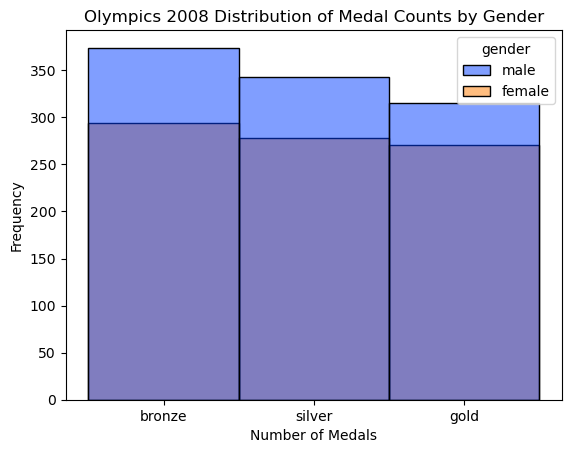

In [8]:
#Histplot
# This histogram allows for me to see the frequency in males to female medals.
sns.histplot(data=df_melted, x="medal", hue="gender", palette="bright")
plt.title("Olympics 2008 Distribution of Medal Counts by Gender")
plt.xlabel("Number of Medals")
plt.ylabel("Frequency")
plt.show()

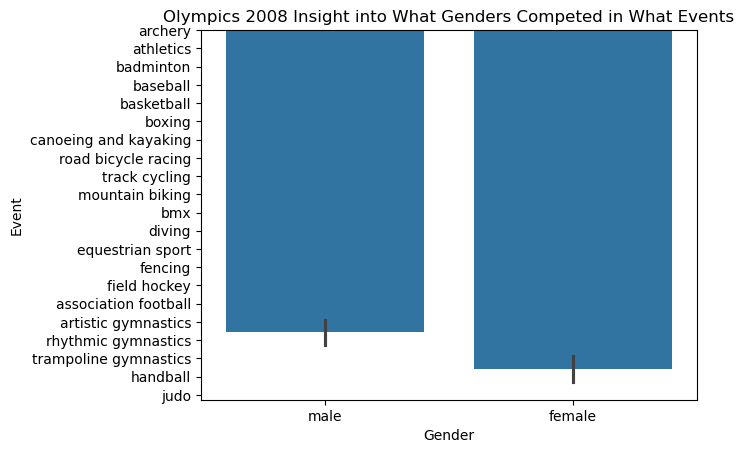

In [9]:
#Barplot
# This bar allows for me to see any events which different genders do NOT partcipate in,
# and as we can see that males do not compete in rhythmic gymnastics, trampoline gymnastics, handball or judo, whereas females do.
sns.barplot(data=df_melted, x="gender", y="event")
plt.title("Olympics 2008 Insight into What Genders Competed in What Events")
plt.xlabel("Gender")
plt.ylabel("Event")
plt.show()

To provide more context to the data set, I included two visualizations of the datasheet. Firstly, I used a histogram to depict the distribution of medal counts between females and males. This way I can get a good look at what kinds of medals males and females got, and how they compare to one another. However, I noticed that there were more medals awarded to women instead of men, so I decided to add a bar graph to look at the events and the genders. From this I learned that females compete in four more events than males do, thus providing evidence for the difference in the number of medals awarded to each gender.

In [10]:
#Pivot Table

pivot_table_medalists = pd.pivot_table(df_melted, values='medal', index='event', columns='gender', aggfunc='count')

print("Pivot Table (Medal Count by Gender):")
display(pivot_table_medalists)

Pivot Table (Medal Count by Gender):


gender,female,male
event,,
archery,9.0,11.0
artistic gymnastics,20.0,29.0
association football,54.0,55.0
athletics,81.0,85.0
badminton,10.0,12.0
baseball,NaN,72.0
basketball,36.0,35.0
beach volleyball,6.0,6.0
bmx,3.0,3.0


Text(50.7222222222222, 0.5, 'Gender')

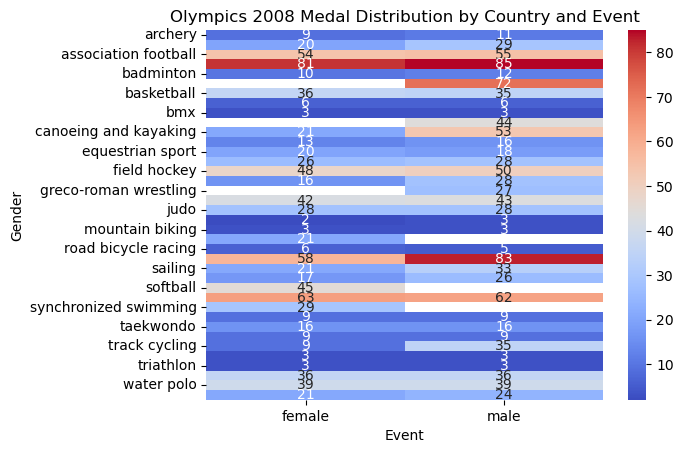

In [14]:
sns.heatmap(pivot_table_medalists, cmap="coolwarm", annot=True)
plt.title("Olympics 2008 Medal Distribution by Country and Event")
plt.xlabel("Event")
plt.ylabel("Gender")

Finally, I decided to create a pivot plot, allowing me to better understand males and females and their events. This way I can better understand how many athletes were awarded medals for their event, and how many were female or male. Though the table provided a lot of clarity, I also provided a heatmap, once again allowing me to compare how many men and women won medals in their event amongst different events.